In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Preprocessing import *
from Models import *
import copy
from Utils import *
pd.set_option('display.max_rows', 200)


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pd.read_csv('../data/digital_twin_ln_monograms.csv')

,id,L1A,L1B,L2A,L2B,L3,L4,L5A,L5B,L6,...,R1A,R1B,R2A,R2B,R3,R4,R5A,R5B,R6,RRPLN
0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,10201,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,10202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
533,10203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
534,10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = DTDataset(use_smote=False)
data.processed_df.T
# data.processed_df#.shape, len(data.processed_df.index.unique())

id,3,5,6,7,8,9,10,11,13,14,...,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205
hpv,1,0,1,1,1,1,-1,1,0,1,...,0,1,-1,0,1,1,0,1,0,1
age,55.969444,20.95,69.930556,72.319444,59.730556,60.083333,67.708333,57.858333,51.758333,56.25,...,47.619444,50.163889,70.888889,67.825,56.336111,49.566667,48.705556,77.116667,45.95,49.733333
packs_per_year,0.0,38.0,35.0,0.0,0.0,0.0,40.0,44.0,0.0,40.0,...,5.0,0.0,50.0,0.0,0.0,30.0,30.0,0.0,5.0,0.0
gender,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
smoking_status,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.5,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.5,0.0
Aspiration rate Pre-therapy,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total_dose,66.0,72.0,70.0,70.0,66.0,66.0,69.96,70.0,70.0,70.0,...,70.0,72.0,66.0,70.0,69.96,70.0,72.0,70.0,69.96,69.96
dose_fraction,2.2,1.8,2.121212,2.121212,2.2,2.2,2.12,2.121212,2.0,2.121212,...,2.121212,1.8,2.2,2.121212,2.12,2.121212,1.714286,2.333333,2.12,2.12
OS (Calculated),6.033333,7.333333,7.466667,7.8,8.066667,8.733333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
Locoregional control (Time),4.7,7.333333,7.466667,7.8,8.066667,8.733333,6.7,8.5,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333


In [6]:
def state_loss(ytrue,ypred,subweights=None,weights=None):
    if weights is None:
        weights = [1,1,1,1]
    if subweights is None:
        subweights = [None,None,None]
    pd_loss = torch.mul(mc_loss(ytrue[0],ypred[0],weights=subweights[0]),weights[0])
    nd_loss = torch.mul(mc_loss(ytrue[1],ypred[1],weights=subweights[1]),weights[1])
    mod_loss = torch.mul(mc_loss(ytrue[2],ypred[2],weights=subweights[2]),weights[2])
    loss = torch.add(pd_loss,torch.add(nd_loss,mod_loss))
    dlt_true = ytrue[3]
    dlt_pred = ypred[3]
    ndlt = dlt_true.shape[1]
#     nloss = torch.nn.NLLLoss()
    bce = torch.nn.BCELoss()
    for i in range(ndlt):
        dlt_loss = bce(dlt_pred[:,i].view(-1),dlt_true[:,i].view(-1))
        dlt_loss = torch.mul(dlt_loss,weights[3]/ndlt)
        loss = torch.add(loss,dlt_loss)
    return loss

def outcome_loss(ytrue,ypred,weights=None,**kwargs):
    if weights is None:
        weights = [1,1,1,1]
    loss = 0
    nloss = torch.nn.BCELoss()
    for i in range(len(weights)):
        iloss = nloss(ypred[:,i],ytrue[i])*weights[i]
        loss += iloss
    return loss

In [7]:

        
def train_state(model=None,
                model_args={},
                state=1,
                split=.7,
                lr=.001,
                epochs=1000,
                patience=10,
                weights=None,
                save_path='../data/models/',
                use_default_split=True,
                use_bagging_split=False,
                resample_training=False,#use bootstraping on training data after splitting
                n_validation_trainsteps=2,
                verbose=True,
                balanced=True,
                sqrt_balance_weights=False,
                use_smote=False,
                smote_cols = None,
                file_suffix=''):
    
    ids = get_dt_ids()
    
    train_ids, test_ids = get_tt_split(use_default_split=use_default_split,use_bagging_split=use_bagging_split,resample_training=resample_training)

    if use_smote:
        if smote_cols is None:
            smote_cols = Const.outcomes
            if state == 1:
                smote_cols = Const.primary_disease_states
            elif state == 2:
                smote_cols = Const.primary_disease_states2
        dataset = DTDataset(use_smote=True,smote_ids = train_ids,smote_columns=[Const.decisions[state-1]])
        train_ids = [i for i in dataset.processed_df.index.values if i not in test_ids]
    else:
        dataset = DTDataset()
    
    #only train on people with  IC for state 1 since other people can't have any outcomes otherwise
    require = None
    if state == 1:
        require = Const.decisions[0] #we don't expect a state update if there is no treatment
        valid_ids = dataset.get_input_state(require=require).index.values
        train_ids = [t for t in train_ids if t in valid_ids]
        test_ids = [t for t in test_ids if t in valid_ids]
    xtrain = dataset.get_input_state(step=state,ids=train_ids,require=require)
    xtest = dataset.get_input_state(step=state,ids=test_ids,require=require)
    ytrain = dataset.get_intermediate_outcomes(step=state,ids=train_ids,require=require)
    ytest = dataset.get_intermediate_outcomes(step=state,ids=test_ids,require=require)
    
    model_args = {k:v for k,v in model_args.items() if 'attention' not in k and 'embed_size' not in k}
    if state < 3:
        if model is None:
                model = BayesianOutcomeSimulator(xtrain.shape[1],state=state,**model_args)
        lfunc = state_loss
        if weights is None:
            weights = [1,1,.1,1]
    else:
        if model is None:
                model = BayesianEndpointSimulator(xtrain.shape[1],**model_args)
        if weights is None:
            weights = [1,1,1,1]
        lfunc = outcome_loss
    print(model.passthrough)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.set_device(device)
    
    balance_weights=None
    if balanced:
        if state < 3:
            balance_weights = [w.to(device) for w in get_weights(ytrain)]
            if sqrt_balance_weights:
                balance_weights = [torch.sqrt(w) for w in balance_weights]
        else:
            print('I dont do balancing on the outputs because Idk how that would work')
    
    hashcode = str(hash(','.join([str(i) for i in train_ids])))
    save_file = save_path + 'model_' + model.identifier + '_split' + str(split) + '_resample' + str(resample_training) +  '_hash' + hashcode + file_suffix + '.tar'
    xtrain = df_to_torch(xtrain).to(device)
    
    xtest = df_to_torch(xtest).to(device)
    ytrain = [df_to_torch(t).to(device) for t in ytrain]
    ytest= [df_to_torch(t).to(device) for t in ytest]
    
    model.fit_normalizer(xtrain)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    best_val_loss = 1000000000000000000000000000
    best_loss_metrics = {}
    last_epoch = False
    for epoch in range(epochs):
        
        model.train(True)
        optimizer.zero_grad()
        
        xtrain_sample = xtrain#[torch.randint(len(xtrain),(len(xtrain),) )]
        ypred = model(xtrain_sample,n_samples=1)
        loss = lfunc(ytrain,ypred,weights=weights,subweights=balance_weights)

        loss.backward()
        optimizer.step()
        if verbose:
            print('epoch',epoch,'train loss',loss.item())
        
        model.eval()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights,subweights=balance_weights)
        if state < 3:
            val_metrics = state_metrics(ytest,yval)
        else:
            val_metrics = outcome_metrics(ytest,yval)
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_loss_metrics = val_metrics
            steps_since_improvement = 0
            torch.save(model.state_dict(),save_file)
        else:
            steps_since_improvement += 1
        if verbose:
            print('val loss',val_loss.item())
            print('______________')
        if steps_since_improvement > patience:
            break
    print('best loss',best_val_loss,best_loss_metrics)
    model.load_state_dict(torch.load(save_file))
    
    #train one step on validation data
    for i in range(n_validation_trainsteps):
        model.train()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights)
        val_loss.backward()
        optimizer.step()
        torch.save(model.state_dict(),save_file)
    
    model.eval()
    print(model(xtest))
    return model,  best_val_loss, best_loss_metrics

from Models import *
t1_args = {'hidden_layers': [500,500],
   'dropout': 0.5,
   'input_dropout': 0.1}
tmodel_balanced = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,.1])
tmodel_balanced[-1]

True
epoch 0 train loss 2.45444393157959
val loss 2.442007541656494
______________
epoch 1 train loss 2.4414334297180176
val loss 2.440481662750244
______________
epoch 2 train loss 2.436631441116333
val loss 2.438868522644043
______________
epoch 3 train loss 2.434013843536377
val loss 2.437312602996826
______________
epoch 4 train loss 2.4279403686523438
val loss 2.435760021209717
______________
epoch 5 train loss 2.4330451488494873
val loss 2.4342010021209717
______________
epoch 6 train loss 2.424380302429199
val loss 2.4326326847076416
______________
epoch 7 train loss 2.42267107963562
val loss 2.431067943572998
______________
epoch 8 train loss 2.4131195545196533
val loss 2.4294538497924805
______________
epoch 9 train loss 2.4161360263824463
val loss 2.427835464477539
______________
epoch 10 train loss 2.4137747287750244
val loss 2.4262073040008545
______________
epoch 11 train loss 2.4122588634490967
val loss 2.4245548248291016
______________
epoch 12 train loss 2.3988592624664

{'pd': {'accuracy': 0.2857142857142857,
  'auc_micro': 0.6698310539018504,
  'auc_mean': 0.5906149623504335,
  'auc_weighted': 0.6195754001492033},
 'nd': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.20514883346741752,
  'auc_mean': 0.43326692633886027,
  'auc_weighted': 0.29953544882790173},
 'mod': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.20514883346741752,
  'auc_mean': 0.43326692633886027,
  'auc_weighted': 0.29953544882790173},
 'dlts': {'accuracy': [0.7857142857142857,
   0.8928571428571429,
   0.9107142857142857,
   0.9464285714285714,
   0.8035714285714286],
  'accuracy_mean': 0.8678571428571429,
  'auc': [0.4393939393939394,
   0.48,
   0.7647058823529411,
   0.2893081761006289,
   0.4949494949494949],
  'auc_mean': 0.49367149855940085}}

In [8]:
tmodel2_balanced = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.1,.1],use_smote=False)
tmodel2_balanced[-1]

True
epoch 0 train loss 2.3890697956085205
val loss 2.3977551460266113
______________
epoch 1 train loss 2.358706474304199
val loss 2.402947187423706
______________
epoch 2 train loss 2.338740110397339
val loss 2.4057230949401855
______________
epoch 3 train loss 2.2897815704345703
val loss 2.408698081970215
______________
epoch 4 train loss 2.259819269180298
val loss 2.4115757942199707
______________
epoch 5 train loss 2.2017548084259033
val loss 2.4143118858337402
______________
epoch 6 train loss 2.141047716140747
val loss 2.4166741371154785
______________
epoch 7 train loss 2.0946671962738037
val loss 2.419412612915039
______________
epoch 8 train loss 2.091634511947632
val loss 2.423240900039673
______________
epoch 9 train loss 2.0465333461761475
val loss 2.4275121688842773
______________
epoch 10 train loss 1.9768725633621216
val loss 2.4322547912597656
______________
epoch 11 train loss 1.9620068073272705
val loss 2.436384439468384
______________
best loss 2.3977551460266113 {'

{'pd': {'accuracy': 0.40108401084010836,
  'auc_micro': 0.6466984661429106,
  'auc_mean': 0.5037004699670863,
  'auc_weighted': 0.6469103865366816},
 'nd': {'accuracy': 0.33326841934436874,
  'auc_micro': 0.673356973995272,
  'auc_mean': 0.4931716330215607,
  'auc_weighted': 0.5158683917441053},
 'mod': {'accuracy': 0.33326841934436874,
  'auc_micro': 0.673356973995272,
  'auc_mean': 0.4931716330215607,
  'auc_weighted': 0.5158683917441053},
 'dlts': {'accuracy': [0.7482993197278912,
   0.9659863945578231,
   0.7074829931972789,
   0.9523809523809523,
   0.8707482993197279],
  'accuracy_mean': 0.8489795918367348,
  'auc': [0.5744897959183674,
   0.6,
   0.5619718309859154,
   0.8101851851851851,
   0.5543209876543209],
  'auc_mean': 0.6201935599487577}}

In [9]:
tmodel1 = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,.1],balanced=False)
tmodel1[1]

True
epoch 0 train loss 2.441500425338745
val loss 2.4283342361450195
______________
epoch 1 train loss 2.432502269744873
val loss 2.4208552837371826
______________
epoch 2 train loss 2.4240636825561523
val loss 2.413308620452881
______________
epoch 3 train loss 2.4135079383850098
val loss 2.405691623687744
______________
epoch 4 train loss 2.4082608222961426
val loss 2.3980069160461426
______________
epoch 5 train loss 2.397787094116211
val loss 2.390233039855957
______________
epoch 6 train loss 2.389173984527588
val loss 2.3823790550231934
______________
epoch 7 train loss 2.38000226020813
val loss 2.3744568824768066
______________
epoch 8 train loss 2.3723299503326416
val loss 2.366455078125
______________
epoch 9 train loss 2.3664886951446533
val loss 2.358351469039917
______________
epoch 10 train loss 2.355839967727661
val loss 2.3501060009002686
______________
epoch 11 train loss 2.345691442489624
val loss 2.3416993618011475
______________
epoch 12 train loss 2.334887504577636

val loss 1.898200273513794
______________
epoch 104 train loss 1.7735116481781006
val loss 1.8972811698913574
______________
epoch 105 train loss 1.7722402811050415
val loss 1.8964042663574219
______________
epoch 106 train loss 1.758225440979004
val loss 1.8954689502716064
______________
epoch 107 train loss 1.7889342308044434
val loss 1.8945972919464111
______________
epoch 108 train loss 1.7780207395553589
val loss 1.8937726020812988
______________
epoch 109 train loss 1.7868345975875854
val loss 1.8930102586746216
______________
epoch 110 train loss 1.7740029096603394
val loss 1.8922176361083984
______________
epoch 111 train loss 1.7733111381530762
val loss 1.891506552696228
______________
epoch 112 train loss 1.7643349170684814
val loss 1.8908416032791138
______________
epoch 113 train loss 1.762342929840088
val loss 1.8901482820510864
______________
epoch 114 train loss 1.7613953351974487
val loss 1.8894647359848022
______________
epoch 115 train loss 1.7520147562026978
val loss

{'predictions': [tensor([[9.9300e-01, 6.9248e-03, 7.2147e-05],
        [7.8562e-01, 2.1138e-01, 3.0055e-03],
        [6.1192e-01, 3.8018e-01, 7.8970e-03],
        [8.5159e-01, 1.4102e-01, 7.3880e-03],
        [4.3108e-01, 5.5814e-01, 1.0781e-02],
        [9.5334e-01, 4.2760e-02, 3.9050e-03],
        [1.8733e-01, 8.0663e-01, 6.0382e-03],
        [4.8675e-01, 5.0047e-01, 1.2778e-02],
        [8.4116e-01, 1.4332e-01, 1.5521e-02],
        [7.7041e-01, 2.2085e-01, 8.7435e-03],
        [6.1071e-01, 3.7273e-01, 1.6555e-02],
        [8.0268e-01, 1.9217e-01, 5.1513e-03],
        [2.6701e-01, 7.3268e-01, 3.0984e-04],
        [1.1492e-01, 8.8346e-01, 1.6246e-03],
        [3.5097e-02, 9.6424e-01, 6.6309e-04],
        [3.1933e-01, 6.7799e-01, 2.6801e-03],
        [1.0759e-01, 8.8728e-01, 5.1269e-03],
        [6.5445e-02, 9.2831e-01, 6.2421e-03],
        [3.7091e-01, 6.1638e-01, 1.2712e-02],
        [1.6386e-01, 8.3598e-01, 1.6622e-04],
        [8.1128e-01, 1.8015e-01, 8.5687e-03],
        [1.7542e-

1.8718830347061157

In [10]:
tmodel2 = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.1,.1],balanced=False)
tmodel2[-1]

True
epoch 0 train loss 2.390890121459961
val loss 2.3092164993286133
______________
epoch 1 train loss 2.302993059158325
val loss 2.2145256996154785
______________
epoch 2 train loss 2.2072629928588867
val loss 2.1202588081359863
______________
epoch 3 train loss 2.1055245399475098
val loss 2.0370640754699707
______________
epoch 4 train loss 2.0161638259887695
val loss 1.9694870710372925
______________
epoch 5 train loss 1.9357692003250122
val loss 1.9188910722732544
______________
epoch 6 train loss 1.8840465545654297
val loss 1.8835874795913696
______________
epoch 7 train loss 1.842713475227356
val loss 1.86038076877594
______________
epoch 8 train loss 1.8093490600585938
val loss 1.8463082313537598
______________
epoch 9 train loss 1.7961602210998535
val loss 1.8374484777450562
______________
epoch 10 train loss 1.774641752243042
val loss 1.83393394947052
______________
epoch 11 train loss 1.7829846143722534
val loss 1.8336597681045532
______________
epoch 12 train loss 1.7558366

{'pd': {'accuracy': 0.3333333333333333,
  'auc_micro': 0.894851290684624,
  'auc_mean': 0.595094251562729,
  'auc_weighted': 0.605789349919714},
 'nd': {'accuracy': 0.31028886725089255,
  'auc_micro': 0.7360047281323877,
  'auc_mean': 0.46794601407030406,
  'auc_weighted': 0.5193149818214685},
 'mod': {'accuracy': 0.31028886725089255,
  'auc_micro': 0.7360047281323877,
  'auc_mean': 0.46794601407030406,
  'auc_weighted': 0.5193149818214685},
 'dlts': {'accuracy': [0.9523809523809523,
   0.9659863945578231,
   0.9659863945578231,
   0.9795918367346939,
   0.9183673469387755],
  'accuracy_mean': 0.9564625850340136,
  'auc': [0.6724489795918367,
   0.7436619718309859,
   0.5338028169014084,
   0.6550925925925926,
   0.615432098765432],
  'auc_mean': 0.6440876919364511}}

In [11]:
tmodel3 = train_state(model_args=t1_args,state=3,lr=.0001,weights=[1,5,10,.11],balanced=False)
tmodel3[-1]

True
epoch 0 train loss 10.766315460205078
val loss 10.516589164733887
______________
epoch 1 train loss 10.548410415649414
val loss 10.31884765625
______________
epoch 2 train loss 10.39267635345459
val loss 10.134413719177246
______________
epoch 3 train loss 10.108226776123047
val loss 9.962098121643066
______________
epoch 4 train loss 9.970778465270996
val loss 9.801210403442383
______________
epoch 5 train loss 9.773353576660156
val loss 9.65216064453125
______________
epoch 6 train loss 9.598212242126465


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 9.51370620727539
______________
epoch 7 train loss 9.452113151550293
val loss 9.384687423706055
______________
epoch 8 train loss 9.314491271972656
val loss 9.26502513885498
______________
epoch 9 train loss 9.146648406982422
val loss 9.153717041015625
______________
epoch 10 train loss 9.053337097167969
val loss 9.050615310668945
______________
epoch 11 train loss 8.977038383483887
val loss 8.954849243164062
______________
epoch 12 train loss 8.833656311035156
val loss 8.866382598876953
______________
epoch 13 train loss 8.709982872009277


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 8.784477233886719
______________
epoch 14 train loss 8.63457202911377
val loss 8.708747863769531
______________
epoch 15 train loss 8.52696418762207
val loss 8.638636589050293
______________
epoch 16 train loss 8.497340202331543
val loss 8.57358455657959
______________
epoch 17 train loss 8.425863265991211
val loss 8.512990951538086
______________
epoch 18 train loss 8.287459373474121
val loss 8.456254959106445
______________
epoch 19 train loss 8.312060356140137
val loss 8.40286922454834
______________
epoch 20 train loss 8.1911039352417


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 8.352431297302246
______________
epoch 21 train loss 8.164189338684082
val loss 8.304781913757324
______________
epoch 22 train loss 8.122418403625488
val loss 8.25950813293457
______________
epoch 23 train loss 8.064916610717773
val loss 8.216291427612305
______________
epoch 24 train loss 7.960406303405762
val loss 8.17505931854248
______________
epoch 25 train loss 7.855668544769287
val loss 8.135248184204102
______________
epoch 26 train loss 7.858551502227783
val loss 8.096561431884766
______________
epoch 27 train loss 7.8014068603515625


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 8.058710098266602
______________
epoch 28 train loss 7.806073188781738
val loss 8.02168083190918
______________
epoch 29 train loss 7.759702682495117
val loss 7.985324382781982
______________
epoch 30 train loss 7.683892250061035
val loss 7.949481010437012
______________
epoch 31 train loss 7.704614639282227
val loss 7.914013862609863
______________
epoch 32 train loss 7.523844242095947
val loss 7.878854274749756
______________
epoch 33 train loss 7.566827774047852
val loss 7.84382438659668
______________
epoch 34 train loss 7.529848098754883


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 7.808861255645752
______________
epoch 35 train loss 7.447157859802246
val loss 7.774040222167969
______________
epoch 36 train loss 7.469823837280273
val loss 7.73923921585083
______________
epoch 37 train loss 7.401754379272461
val loss 7.704873561859131
______________
epoch 38 train loss 7.355116367340088
val loss 7.67061710357666
______________
epoch 39 train loss 7.364980220794678
val loss 7.6364426612854
______________
epoch 40 train loss 7.312980651855469
val loss 7.602354049682617
______________
epoch 41 train loss 7.134480953216553


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 7.568500518798828
______________
epoch 42 train loss 7.192424297332764
val loss 7.534839153289795
______________
epoch 43 train loss 7.107553958892822
val loss 7.501356601715088
______________
epoch 44 train loss 7.0826005935668945
val loss 7.46829891204834
______________
epoch 45 train loss 7.090117454528809
val loss 7.435532093048096
______________
epoch 46 train loss 6.858674049377441
val loss 7.402995586395264
______________
epoch 47 train loss 6.895374298095703
val loss 7.370680809020996
______________
epoch 48 train loss 6.79820442199707


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 7.338964462280273
______________
epoch 49 train loss 6.835765361785889
val loss 7.307605743408203
______________
epoch 50 train loss 6.797582626342773
val loss 7.276665210723877
______________
epoch 51 train loss 6.838634967803955
val loss 7.245874881744385
______________
epoch 52 train loss 6.784927845001221
val loss 7.215573310852051
______________
epoch 53 train loss 6.7464985847473145
val loss 7.185694217681885
______________
epoch 54 train loss 6.611560344696045
val loss 7.156497955322266
______________
epoch 55 train loss 6.619876861572266


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 7.127757549285889
______________
epoch 56 train loss 6.612387657165527
val loss 7.0994977951049805
______________
epoch 57 train loss 6.620551109313965
val loss 7.071997165679932
______________
epoch 58 train loss 6.6554341316223145
val loss 7.044949531555176
______________
epoch 59 train loss 6.453434467315674
val loss 7.0186872482299805
______________
epoch 60 train loss 6.450052738189697
val loss 6.992952823638916
______________
epoch 61 train loss 6.494443416595459
val loss 6.967946529388428
______________
epoch 62 train loss 6.461003303527832


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.9432759284973145
______________
epoch 63 train loss 6.4293413162231445
val loss 6.919222831726074
______________
epoch 64 train loss 6.328774452209473
val loss 6.89591646194458
______________
epoch 65 train loss 6.341504096984863
val loss 6.873459339141846
______________
epoch 66 train loss 6.215392112731934
val loss 6.851609706878662
______________
epoch 67 train loss 6.197118282318115
val loss 6.83035135269165
______________
epoch 68 train loss 6.103055953979492
val loss 6.8097004890441895
______________
epoch 69 train loss 6.12383508682251


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.7898268699646
______________
epoch 70 train loss 6.241664409637451
val loss 6.770497798919678
______________
epoch 71 train loss 6.218850135803223
val loss 6.751892566680908
______________
epoch 72 train loss 6.143100738525391
val loss 6.7339186668396
______________
epoch 73 train loss 6.117455005645752
val loss 6.716418266296387
______________
epoch 74 train loss 6.029694557189941
val loss 6.699568748474121
______________
epoch 75 train loss 5.977872848510742
val loss 6.683221340179443
______________
epoch 76 train loss 5.994131088256836


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.667324066162109
______________
epoch 77 train loss 6.0599045753479
val loss 6.652166843414307
______________
epoch 78 train loss 5.915594577789307
val loss 6.6374077796936035
______________
epoch 79 train loss 5.948705196380615
val loss 6.623316764831543
______________
epoch 80 train loss 5.850760459899902
val loss 6.609958648681641
______________
epoch 81 train loss 5.853145599365234
val loss 6.5969953536987305
______________
epoch 82 train loss 5.76356315612793
val loss 6.584524631500244
______________
epoch 83 train loss 5.808760643005371


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.572626113891602
______________
epoch 84 train loss 5.797276973724365
val loss 6.561285972595215
______________
epoch 85 train loss 5.710211753845215
val loss 6.550416946411133
______________
epoch 86 train loss 5.641881942749023
val loss 6.540077209472656
______________
epoch 87 train loss 5.7578535079956055
val loss 6.529905796051025
______________
epoch 88 train loss 5.712749004364014
val loss 6.520359039306641
______________
epoch 89 train loss 5.681254863739014
val loss 6.511109828948975
______________
epoch 90 train loss 5.646327495574951


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.5023674964904785
______________
epoch 91 train loss 5.635415077209473
val loss 6.493837833404541
______________
epoch 92 train loss 5.633194923400879
val loss 6.485901355743408
______________
epoch 93 train loss 5.51234769821167
val loss 6.478636741638184
______________
epoch 94 train loss 5.4216628074646
val loss 6.471580982208252
______________
epoch 95 train loss 5.533780574798584
val loss 6.4646501541137695
______________
epoch 96 train loss 5.5638041496276855
val loss 6.458027362823486
______________
epoch 97 train loss 5.53319787979126


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.451474189758301
______________
epoch 98 train loss 5.421935081481934
val loss 6.445560455322266
______________
epoch 99 train loss 5.471414089202881
val loss 6.439870834350586
______________
epoch 100 train loss 5.426506042480469
val loss 6.4345550537109375
______________
epoch 101 train loss 5.462275505065918
val loss 6.429478645324707
______________
epoch 102 train loss 5.4590678215026855
val loss 6.424408912658691
______________
epoch 103 train loss 5.444484233856201
val loss 6.419787883758545
______________
epoch 104 train loss 5.418193340301514


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 6.415471076965332
______________
epoch 105 train loss 5.300994396209717
val loss 6.4112229347229
______________
epoch 106 train loss 5.24564266204834
val loss 6.407602310180664
______________
epoch 107 train loss 5.295328617095947
val loss 6.40416145324707
______________
epoch 108 train loss 5.271939754486084
val loss 6.4012346267700195
______________
epoch 109 train loss 5.177288055419922
val loss 6.3988037109375
______________
epoch 110 train loss 5.254215240478516
val loss 6.396600246429443
______________
epoch 111 train loss 5.226347923278809


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


val loss 6.394745349884033
______________
epoch 112 train loss 5.255620956420898
val loss 6.392877578735352
______________
epoch 113 train loss 5.106101989746094
val loss 6.391353607177734
______________
epoch 114 train loss 5.183284282684326
val loss 6.390119552612305
______________
epoch 115 train loss 5.188669204711914
val loss 6.389248847961426
______________
epoch 116 train loss 5.081326484680176
val loss 6.388792037963867
______________
epoch 117 train loss 5.204770088195801
val loss 6.388157367706299
______________
epoch 118 train loss 5.018970012664795
val loss 6.388044357299805
______________
epoch 119 train loss 5.027988910675049
val loss 6.388287544250488
______________
epoch 120 train loss 5.041360855102539
val loss 6.388777732849121
______________
epoch 121 train loss 5.048886299133301
val loss 6.389660358428955
______________
epoch 122 train loss 4.999200344085693
val loss 6.390485763549805
______________
epoch 123 train loss 4.884424209594727
val loss 6.3912224769592285


{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.1047676,
  'auc': 0.5009541984732824,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.7891156462585034,
  'mse': 0.15740116,
  'auc': 0.7097826086956521,
  'precision': 0.6,
  'recall': 0.09375,
  'f1': 0.16216216216216214},
 'Aspiration rate Post-therapy': {'accuracy': 0.8299319727891157,
  'mse': 0.11662128,
  'auc': 0.8502860775588048,
  'precision': 0.5333333333333333,
  'recall': 0.3076923076923077,
  'f1': 0.3902439024390244},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.097198255,
  'auc': 0.6095959595959597,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [12]:
tmodel3_balanced = train_state(model_args=t1_args,state=3,lr=.001,weights=[.1,1,10,.1])
tmodel3_balanced[-1]

True
I dont do balancing on the outputs because Idk how that would work
epoch 0 train loss 7.754662036895752
val loss 6.437239170074463
______________
epoch 1 train loss 6.379185199737549
val loss 6.015985012054443
______________
epoch 2 train loss 5.93544340133667
val loss 5.935965061187744
______________
epoch 3 train loss 5.802948474884033
val loss 5.857913494110107
______________
epoch 4 train loss 5.526302814483643
val loss 5.700078964233398
______________
epoch 5 train loss 5.409726142883301
val loss 5.469363689422607
______________
epoch 6 train loss 5.1477437019348145


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 5.227183818817139
______________
epoch 7 train loss 4.9110918045043945
val loss 5.022412300109863
______________
epoch 8 train loss 4.722045421600342
val loss 4.869678974151611
______________
epoch 9 train loss 4.53380823135376
val loss 4.763672351837158
______________
epoch 10 train loss 4.49481725692749
val loss 4.681669235229492
______________
epoch 11 train loss 4.350358486175537
val loss 4.603146553039551
______________
epoch 12 train loss 4.252280235290527
val loss 4.523738384246826
______________
epoch 13 train loss 4.130683898925781


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 4.447532653808594
______________
epoch 14 train loss 4.011051654815674
val loss 4.387654781341553
______________
epoch 15 train loss 3.8644113540649414
val loss 4.350637912750244
______________
epoch 16 train loss 3.814122200012207
val loss 4.338679313659668
______________
epoch 17 train loss 3.6779897212982178
val loss 4.339749336242676
______________
epoch 18 train loss 3.7483928203582764
val loss 4.339678764343262
______________
epoch 19 train loss 3.620119094848633
val loss 4.329483985900879
______________
epoch 20 train loss 3.4404661655426025
val loss 4.308600425720215
______________
epoch 21 train loss 3.4154672622680664


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 4.278504371643066
______________
epoch 22 train loss 3.229616165161133
val loss 4.251502513885498
______________
epoch 23 train loss 3.267770767211914
val loss 4.228795051574707
______________
epoch 24 train loss 3.1542069911956787
val loss 4.2159037590026855
______________
epoch 25 train loss 3.212791681289673
val loss 4.212985515594482
______________
epoch 26 train loss 3.090315341949463
val loss 4.218525409698486
______________
epoch 27 train loss 2.987220287322998
val loss 4.234605312347412
______________
epoch 28 train loss 2.834591865539551
val loss 4.261004447937012
______________
epoch 29 train loss 2.75785231590271
val loss 4.299255847930908
______________
epoch 30 train loss 2.8491058349609375
val loss 4.348973274230957
______________
epoch 31 train loss 2.732964515686035
val loss 4.4028401374816895
______________
epoch 32 train loss 2.580998420715332
val loss 4.456833362579346
______________
epoch 33 train loss 2.502309560775757
val loss 4.50139856338501
___________

{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.10797516,
  'auc': 0.5109732824427481,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.7687074829931972,
  'mse': 0.16189484,
  'auc': 0.7040760869565217,
  'precision': 0.375,
  'recall': 0.09375,
  'f1': 0.15},
 'Aspiration rate Post-therapy': {'accuracy': 0.8299319727891157,
  'mse': 0.121537656,
  'auc': 0.8369357914812461,
  'precision': 0.5238095238095238,
  'recall': 0.4230769230769231,
  'f1': 0.4680851063829788},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.0919884,
  'auc': 0.6505050505050505,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [13]:
[m[1] for m in [tmodel1,tmodel_balanced,tmodel2,tmodel2_balanced,tmodel3,tmodel3_balanced]]

[1.8718830347061157,
 2.338216781616211,
 1.8336597681045532,
 2.3977551460266113,
 6.388044357299805,
 4.212985515594482]

In [51]:
tmodel1[0].set_device('cpu')
tmodel2[0].set_device('cpu')


torch.save(tmodel1[0],'../resources/transition1_model.pt')
torch.save(tmodel2[0],'../resources/transition2_model.pt')

# tmodel3[0].set_device('cpu')
# torch.save(tmodel3[0],'../resources/outcome_model.pt')
tmodel3_balanced[0].set_device('cpu')
torch.save(tmodel3_balanced[0],'../resources/outcome_model.pt')

In [153]:
def merge_tmodel_results(t1,t2,t3):
    r1 = t1[-1]
    r2 = t2[-1]
    r3 = t3[-1]
    res_list = []
    for state, result in enumerate([r1,r2,r3]):
        for outcome, metricdict in result.items():
            if outcome == 'dlts':
                for metric, values in metricdict.items():
                    try:
                        for dltname, value in zip(Const.dlt1,values):
                            entry = {
                                'state': state + 1,
                                'outcome': dltname,
                                'metric': metric,
                                'value': value,
                            }
                            res_list.append(entry)
                    except:
                        entry = {
                            'state': state + 1,
                            'outcome': outcome,
                            'metric': metric,
                            'value': values
                        }
                        res_list.append(entry)
            else:
                for metric, value in metricdict.items():
                    entry = {
                        'state': state + 1,
                        'outcome': outcome,
                        'metric': metric,
                        'value': value
                    }
                    res_list.append(entry)
    return pd.DataFrame(res_list)
import time
model_results = merge_tmodel_results(tmodel1,tmodel2,tmodel3_balanced)
model_results.to_csv('../results/transition_models_' + str(time.time()) + '.csv')
model_results_balanced = merge_tmodel_results(tmodel_balanced,tmodel2_balanced,tmodel3_balanced)
model_results_balanced

,state,outcome,metric,value
0,1,pd,accuracy,0.285714
1,1,pd,auc_micro,0.669831
2,1,pd,auc_mean,0.590615
3,1,pd,auc_weighted,0.619575
4,1,nd,accuracy,0.296296
5,1,nd,auc_micro,0.205149
6,1,nd,auc_mean,0.433267
7,1,nd,auc_weighted,0.299535
8,1,mod,accuracy,0.296296
9,1,mod,auc_micro,0.205149


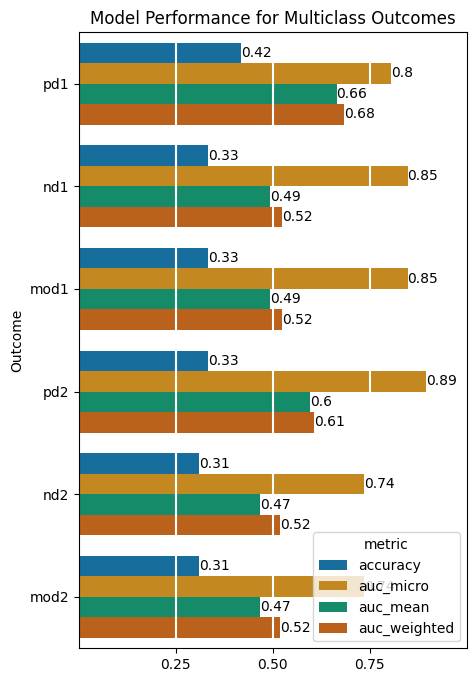

In [154]:
from matplotlib.container import BarContainer
def plot_mc_results(mr,title='Model Performance for Multiclass Outcomes'):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].astype(str)
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc_micro'].shape[0] > 0).reset_index()
    metrics = set(['auc_mean','accuracy','auc_micro','auc_weighted'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(title)
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xlim(0,1)
    ax.set_xticks([.25,.5,.75])
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')

plot_mc_results(model_results)

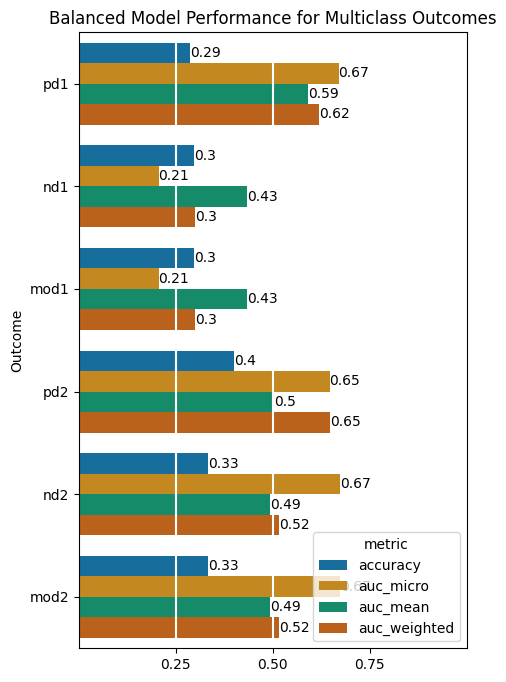

In [155]:
plot_mc_results(model_results_balanced,title="Balanced Model Performance for Multiclass Outcomes")

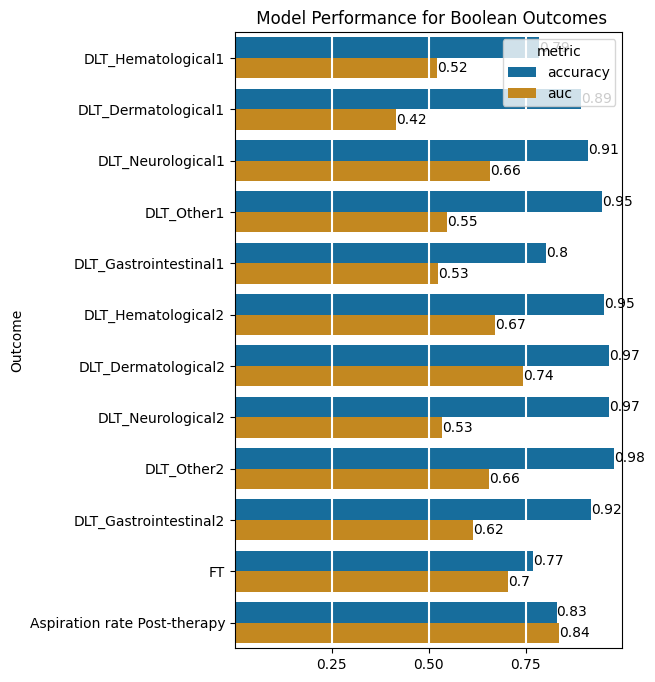

In [157]:
def plot_bool_results(mr,model_name=''):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].apply(lambda x: str(x) if x < 3 else '')
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc'].shape[0] > 0).reset_index()
    metrics = set(['auc','accuracy'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(model_name + ' Model Performance for Boolean Outcomes')
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xticks([.25,.5,.75])
    ax.set_xlim(0,1)
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')
plot_bool_results(model_results)

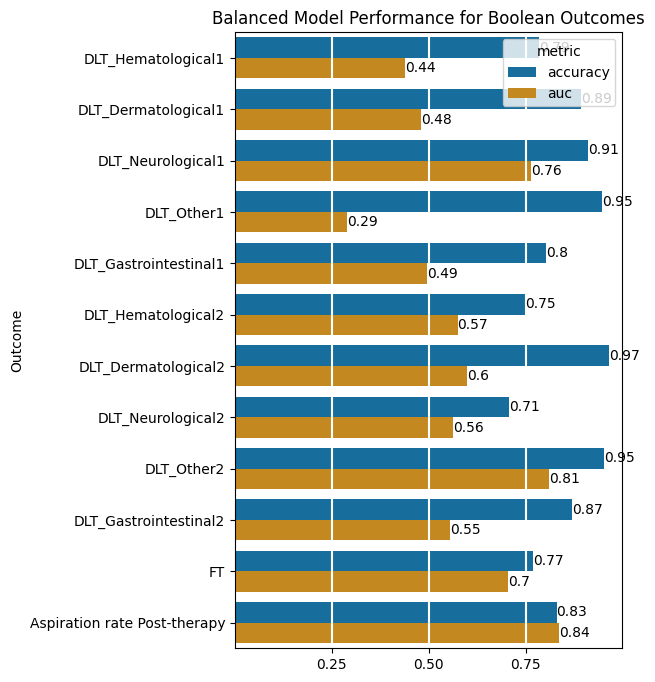

In [159]:
plot_bool_results(model_results_balanced,'Balanced')

0
Axes(0.125,0.653529;0.0407895x0.226471)
1
Axes(0.173947,0.653529;0.0407895x0.226471)
2
Axes(0.222895,0.653529;0.0407895x0.226471)
3
Axes(0.271842,0.653529;0.0407895x0.226471)
4
Axes(0.320789,0.653529;0.0407895x0.226471)
5
Axes(0.369737,0.653529;0.0407895x0.226471)
6
Axes(0.418684,0.653529;0.0407895x0.226471)
7
Axes(0.467632,0.653529;0.0407895x0.226471)
8
Axes(0.516579,0.653529;0.0407895x0.226471)
9
Axes(0.565526,0.653529;0.0407895x0.226471)
10
Axes(0.614474,0.653529;0.0407895x0.226471)
11
Axes(0.663421,0.653529;0.0407895x0.226471)
12
Axes(0.712368,0.653529;0.0407895x0.226471)
13
Axes(0.761316,0.653529;0.0407895x0.226471)
14
Axes(0.810263,0.653529;0.0407895x0.226471)
15
Axes(0.859211,0.653529;0.0407895x0.226471)
0
Axes(0.125,0.381765;0.0407895x0.226471)
1
Axes(0.173947,0.381765;0.0407895x0.226471)
2
Axes(0.222895,0.381765;0.0407895x0.226471)
3
Axes(0.271842,0.381765;0.0407895x0.226471)
4
Axes(0.320789,0.381765;0.0407895x0.226471)
5
Axes(0.369737,0.381765;0.0407895x0.226471)
6
Axes(0.4

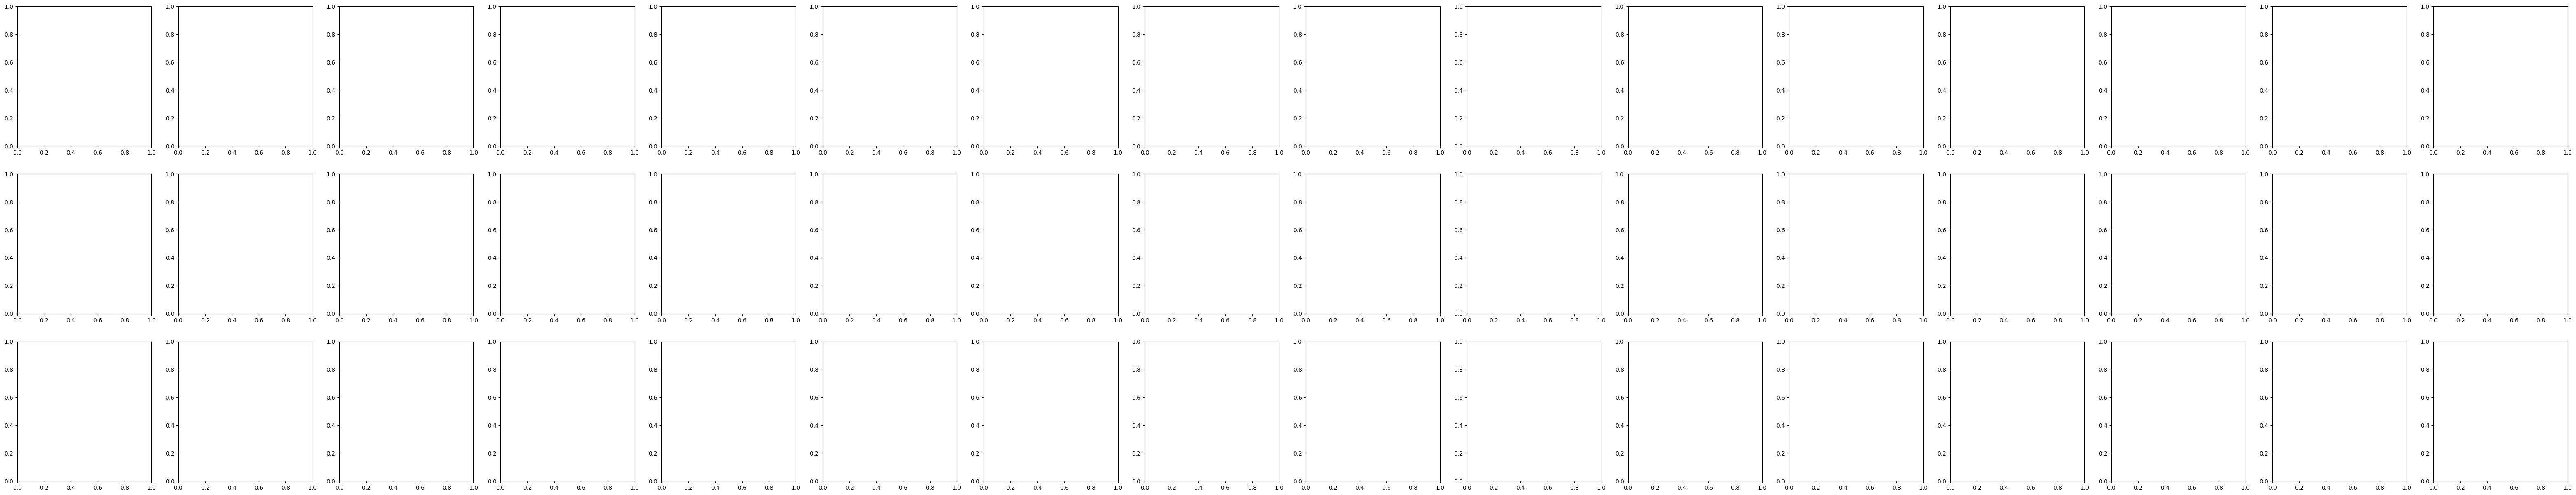

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = set(['auc','accuracy','f1','auc_weighted'])
subdf = model_results[model_results.metric.apply(lambda x: x in metrics)]
lengths = [subdf[subdf.state == i+1].shape[0] for i in range(3)]
fig, axes = plt.subplots(3,max(lengths),figsize=(5*max(lengths),15))
for i in range(3):
    axx = axes[i]
    subsubdf = subdf[subdf.state == i + 1]
    ii =0
    for iii,row in subsubdf.iterrows():
        ax = axes[i,ii]
        ii += 1
        

In [ ]:
#outdated code for doing an ensembel of stuff instead of using bayesian inference via dropout
def train_model_ensemble(model_arg_list,state,
                         n_bags=20,
                         smote_options=[True,False],
                         smote_baseline_options=[True,False],
                         weight_options=[None],
                         weight_baseline_options=[None],
                         **kwargs):
    resampled_models =[]
    base_models = []
    base_metrics = []
    resample_metrics = []
    base_losses = []
    resample_losses = []
    n_errors = 0
    for margs in model_arg_list:
        for s in smote_baseline_options:
            for w in weight_baseline_options:
                [base_model,blosses,bmetrics] = train_state(model_args=margs,state=state,
                                         resample_training=False,
                                         use_smote=smote_options,
                                         weights=w,
                                         verbose=False,**kwargs)
                base_models.append(base_model)
                base_metrics.append(bmetrics)
                base_losses.append(blosses)
        for n in range(n_bags):
            for s in smote_options:
                for w in weight_options:
                    #this can fail if I resample a bad distribution with no minority classes
                    done = False
                    while not done:
                        try:
                            [model,loss,metrics] = train_state(model_args=margs,
                                                state=state,resample_training=True,
                                                use_smote=s,
                                                weights=w,
                                                verbose=False,**kwargs)
                            resampled_models.append(model)
                            resample_metrics.append(metrics)
                            resample_losses.append(loss)
                            done=True
                            print('model_done',len(base_models)+len(resampled_models))
                        except Exception as e:
                            print('error training model')
                            print(e)
                            n_errors += 1
    print('done with',n_errors,'errors')
    return base_models,resampled_models